## Homework 3: Data exploration and visualization

In this homework you will practice manipulating, exploring and visualizing data in order to answer questions about the data.

Before you begin, download this notebook, and the files "data/hw3_health_w.txt" and "data/hw3_health_m.txt" to your computer and copy them to your own repository. As we discussed in the last class, the easiest way to do that is if you clone the class repository in a separate folder on your computer with the command:

```git clone https://github.com/venpopov/DataSciencePsychUZH```

If you have already cloned previously the class repository, you can update it on your computer with the new files by "pulling" information from github via the following command, which you need to run while your terminal is in your "DataSciencePsychUZH" folder:

```git pull```



### Loading and manipulating data

The datasets `hw3_health_m.txt` and `hw3_health_w.txt` contain data for the average number of steps per day and the BMI index for a number of men and women, respectively.

First, load the two datasets via the `read.table()` command. You need to specify that the first row of the files contains the variable names, by setting the `header = TRUE` argument in the `read.table()` command **(1 point)**:

In [51]:
health_m <- read.table(("/Users/Lia/Documents/Lia/Universität/Master (Zürich) ab HS 19/Psychologie/4. Semester/Data Science for Psychologists/DataSciencePsychUZH/Homeworks/data/hw3_health_m.txt"), header = TRUE)

health_w <- read.table(("/Users/Lia/Documents/Lia/Universität/Master (Zürich) ab HS 19/Psychologie/4. Semester/Data Science for Psychologists/DataSciencePsychUZH/Homeworks/data/hw3_health_w.txt"), header = TRUE)

In [52]:
head(health_m)
head(health_w)

,ID,steps,bmi
,<int>,<int>,<dbl>
1,1,15000,16.9
2,2,15000,16.9
3,6,14861,16.8
4,7,14861,16.8
5,8,14699,17.3
6,10,14560,20.5


,ID,steps,bmi
,<int>,<int>,<dbl>
1,3,15000,17.0
2,4,14861,17.2
3,5,14861,17.2
4,9,14699,16.8
5,12,14560,20.4
6,14,14560,20.5


Use the `str()` and `head()` commands to become familiar with the structure of the datasets **(1 point)**

In [53]:
str(health_m)
str(health_w)

'data.frame':	865 obs. of  3 variables:
 $ ID   : int  1 2 6 7 8 10 11 13 17 18 ...
 $ steps: int  15000 15000 14861 14861 14699 14560 14560 14560 14560 14560 ...
 $ bmi  : num  16.9 16.9 16.8 16.8 17.3 20.5 20.6 20.5 20.4 20.4 ...
'data.frame':	921 obs. of  3 variables:
 $ ID   : int  3 4 5 9 12 14 15 16 21 23 ...
 $ steps: int  15000 14861 14861 14699 14560 14560 14560 14560 14560 14560 ...
 $ bmi  : num  17 17.2 17.2 16.8 20.4 20.5 20.5 20.5 19.7 19.6 ...


In [54]:
library(tidyverse)
health_w %>% count(ID)
health_m %>% count(ID)

ID,n
<int>,<int>
3,1
4,1
5,1
9,1
12,1
14,1
15,1
16,1
21,1


ID,n
<int>,<int>
1,1
2,1
6,1
7,1
8,1
10,1
11,1
13,1
17,1


Based on the output from the `str()` command, how many men and women is there data for? **(1 point)**
- *There is data for 921 women and 865 men.*

Based on what you learned in the previous homework, are these datasets tidy? Please explain your answer. If necessary, write code in the field below to tidy up the datasets **(2 points)**
- *There's the problem of a single observational unit being stored in multiple tables. The files are split up by the variable "gender"*

In [55]:
health_all <- bind_rows(lst(health_m, health_w), .id="gender")
head(health_all)
print(health_all)

,gender,ID,steps,bmi
,<chr>,<int>,<int>,<dbl>
1,health_m,1,15000,16.9
2,health_m,2,15000,16.9
3,health_m,6,14861,16.8
4,health_m,7,14861,16.8
5,health_m,8,14699,17.3
6,health_m,10,14560,20.5


       gender   ID steps  bmi
1    health_m    1 15000 16.9
2    health_m    2 15000 16.9
3    health_m    6 14861 16.8
4    health_m    7 14861 16.8
5    health_m    8 14699 17.3
6    health_m   10 14560 20.5
7    health_m   11 14560 20.6
8    health_m   13 14560 20.5
9    health_m   17 14560 20.4
10   health_m   18 14560 20.4
11   health_m   19 14560 19.8
12   health_m   20 14560 19.7
13   health_m   22 14560 19.7
14   health_m   24 14560 19.6
15   health_m   25 14560 19.6
16   health_m   27 14560 19.6
17   health_m   29 14560 17.4
18   health_m   30 14560 17.4
19   health_m   32 14398 20.9
20   health_m   37 14398 17.5
21   health_m   40 14398 17.1
22   health_m   42 14259 21.1
23   health_m   43 14259 21.1
24   health_m   46 14259 18.9
25   health_m   47 14259 17.5
26   health_m   49 14259 17.2
27   health_m   50 14259 16.7
28   health_m   51 14097 21.3
29   health_m   52 14097 21.3
30   health_m   54 14097 18.6
31   health_m   55 14097 18.6
32   health_m   57 14097 17.3
33   healt

In [56]:
health_all$gender <- gsub("health_m", "m", health_all$gender)
health_all$gender <- gsub("health_w", "w", health_all$gender)
print(health_all)

     gender   ID steps  bmi
1         m    1 15000 16.9
2         m    2 15000 16.9
3         m    6 14861 16.8
4         m    7 14861 16.8
5         m    8 14699 17.3
6         m   10 14560 20.5
7         m   11 14560 20.6
8         m   13 14560 20.5
9         m   17 14560 20.4
10        m   18 14560 20.4
11        m   19 14560 19.8
12        m   20 14560 19.7
13        m   22 14560 19.7
14        m   24 14560 19.6
15        m   25 14560 19.6
16        m   27 14560 19.6
17        m   29 14560 17.4
18        m   30 14560 17.4
19        m   32 14398 20.9
20        m   37 14398 17.5
21        m   40 14398 17.1
22        m   42 14259 21.1
23        m   43 14259 21.1
24        m   46 14259 18.9
25        m   47 14259 17.5
26        m   49 14259 17.2
27        m   50 14259 16.7
28        m   51 14097 21.3
29        m   52 14097 21.3
30        m   54 14097 18.6
31        m   55 14097 18.6
32        m   57 14097 17.3
33        m   60 13958 21.4
34        m   61 13958 21.4
35        m   66 139

### Exploring the BMI variable

Let's try to understand our data better. Use `ggplot()` to answer the following questions:

How is the BMI distributed overall, regardless of gender? (hint: use either `geom_density()`; **2 points**) 

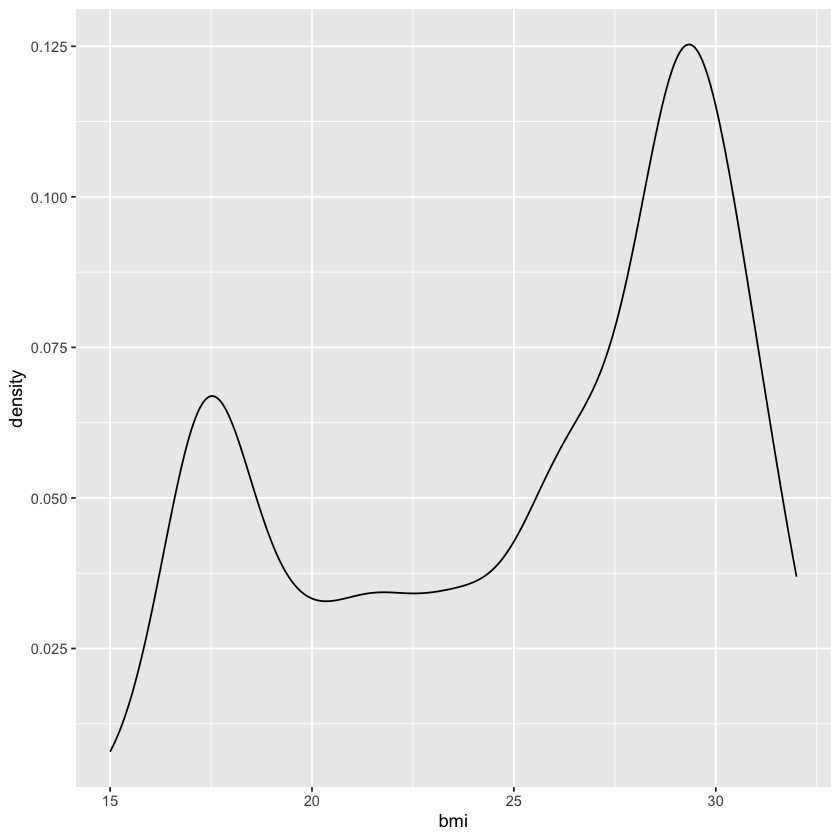

In [57]:
library(ggplot2)
ggplot(health_all, aes(x = bmi)) +
  stat_density(mapping = NULL,position="identity",geom="line")

How would you describe the distribution you found in the previous command?
- The distribution is quite broad ranged. From underweight to overweight, there's everything. Interestingly there are more overweighted or underweighted than bmi's in the normal weight range.  

Do men and women differ in their BMI? First, run a T test via the `t.test()` command to answer this question **(2 points)**

In [58]:
mean(health_m[,3])
sd(health_m[,3])
mean(health_w[,3])
sd(health_w[,3])


[1] 24.90775

[1] 4.96854

[1] 25.65755

[1] 4.815045

In [59]:
BMI_m <- c(rnorm(865, mean = 24.91, sd = 4.97))
BMI_w <- c(rnorm(921, mean = 25.66, sd = 4.82))

t.test(BMI_m, BMI_w, paired = FALSE)


	Welch Two Sample t-test

data:  BMI_m and BMI_w
t = -2.4789, df = 1766.7, p-value = 0.01327
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0473978 -0.1220844
sample estimates:
mean of x mean of y 
 25.04171  25.62645 


- *It shows that the womens mean BMI is significantly different compared to the one from men.*

Can the results of your `t.test()` explain the shape of the distribution of BMI you found in the previous step? Add the `color=gender` argument in the `aes()` part of your previous `ggplot()` call to split the distribution by gender and answer this question **(3 points)**

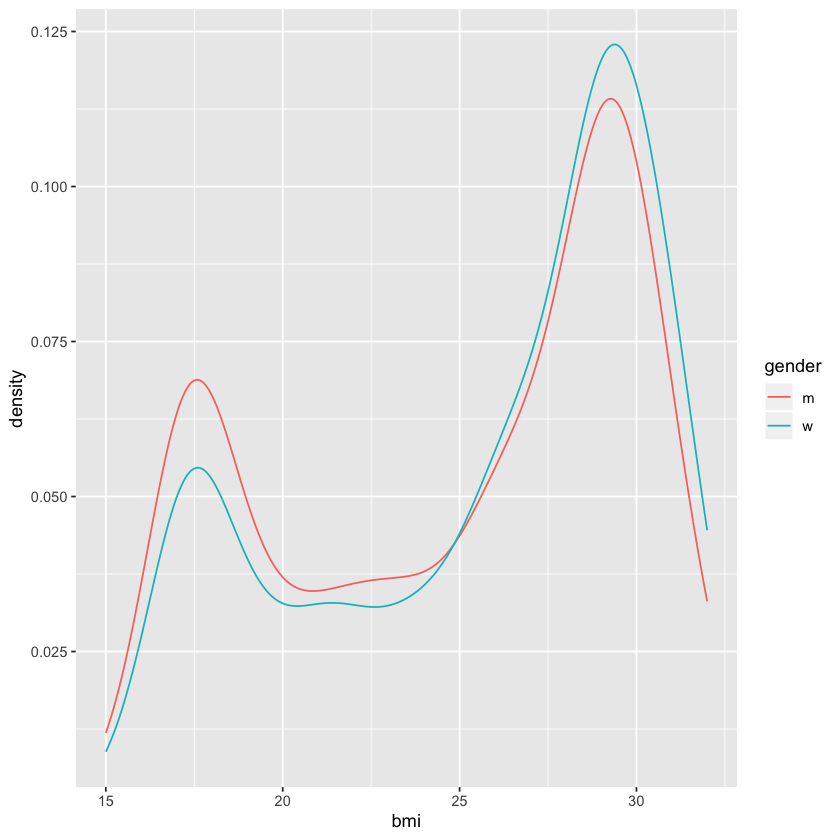

In [60]:
ggplot(health_all, aes(x = bmi, color = gender)) +
  stat_density(mapping = NULL,position="identity",geom="line")

- *The results of the t-test can not explain the shape of the distribution of BMI found in the previous step. But as I split the distribution for gender, the plot shows the difference between men and women. It can be said, that women and men differ significantly (see t-test) concerning BMI, which is also shown with the two lines.*

### Exploring the STEPS variable

Some errors were made when coding the steps variable. Plot a histogram of the `steps` variable. What is unusual about this data? **(2 points)**

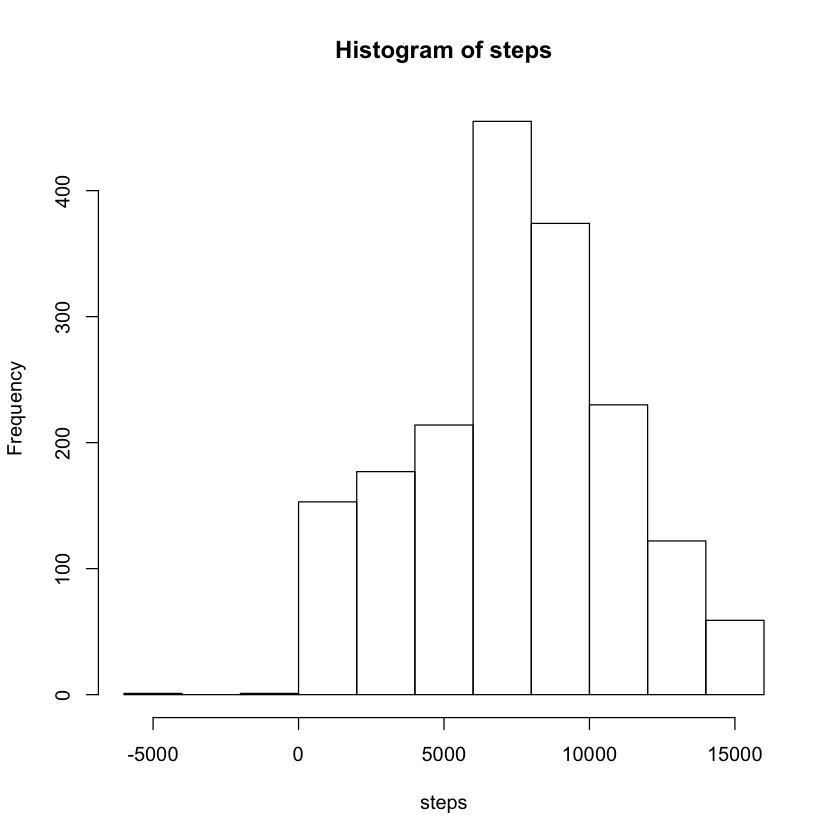

In [61]:
steps <- health_all$steps
hist(steps)

- *It looks like, some participants (though it weren't many at all), would have done "minus steps", which isn't possible.*


One data point needs to be removed from this dataset. Use the `filter()` command on the `steps` variable to remove the incorrect data point, and save the result to a new data frame **(2 points)**

In [62]:
filter(health_all, steps > 0, .preserve = TRUE)

health_all_filtered <- filter(health_all, steps > 0, .preserve = TRUE)

head(health_all_filtered)

gender,ID,steps,bmi
<chr>,<int>,<int>,<dbl>
m,1,15000,16.9
m,2,15000,16.9
m,6,14861,16.8
m,7,14861,16.8
m,8,14699,17.3
m,10,14560,20.5
m,11,14560,20.6
m,13,14560,20.5
m,17,14560,20.4


,gender,ID,steps,bmi
,<chr>,<int>,<int>,<dbl>
1,m,1,15000,16.9
2,m,2,15000,16.9
3,m,6,14861,16.8
4,m,7,14861,16.8
5,m,8,14699,17.3
6,m,10,14560,20.5


### The relationship between daily steps and BMI

Now that we understand how the individual variables are distributed, and that we have cleaned up the incorrectly coded data point, it's time to understand whether daily steps are related to BMI. 

Please use the `cor.test()` function to answer the following questions **(5 points)**
- *Is there a statistically significant correlation between daily steps and BMI*
- *Does the correlation between daily steps and BMI differ for men and women*

In [63]:
bmi <- health_all_filtered[,4]
steps <-health_all_filtered[,3]
cor.test(~bmi + steps)


	Pearson's product-moment correlation

data:  bmi and steps
t = -12.551, df = 1782, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3270726 -0.2417778
sample estimates:
       cor 
-0.2849893 


In [64]:
cor.test(formula = ~ bmi + steps,
         data = health_all_filtered,
         subset = gender == "m")


	Pearson's product-moment correlation

data:  bmi and steps
t = -6.9541, df = 863, p-value = 7.006e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2925195 -0.1662485
sample estimates:
       cor 
-0.2303534 


In [65]:
cor.test(formula = ~ bmi + steps,
         data = health_all_filtered,
         subset = gender == "w")


	Pearson's product-moment correlation

data:  bmi and steps
t = -10.181, df = 917, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3756145 -0.2593635
sample estimates:
       cor 
-0.3186869 


- *Yes, there is a significant negativ correlation between BMI and daily steps (r= -0.2849893). The more steps someone does per day, the less high is his/her BMI.*

- The correlation between daily steps and BMI differ from men to women: In both cases, there's a negative correlation. But the negative correlation in women are even stronger (r = -0.3186869 vs. r = -0.2303534). 


Finally, in addition to running a statistical correlation test, what else can you do to better understand the relationship between daily steps and BMI? How would you described this relationship? **(3 points)** 

No summary function supplied, defaulting to `mean_se()

No summary function supplied, defaulting to `mean_se()



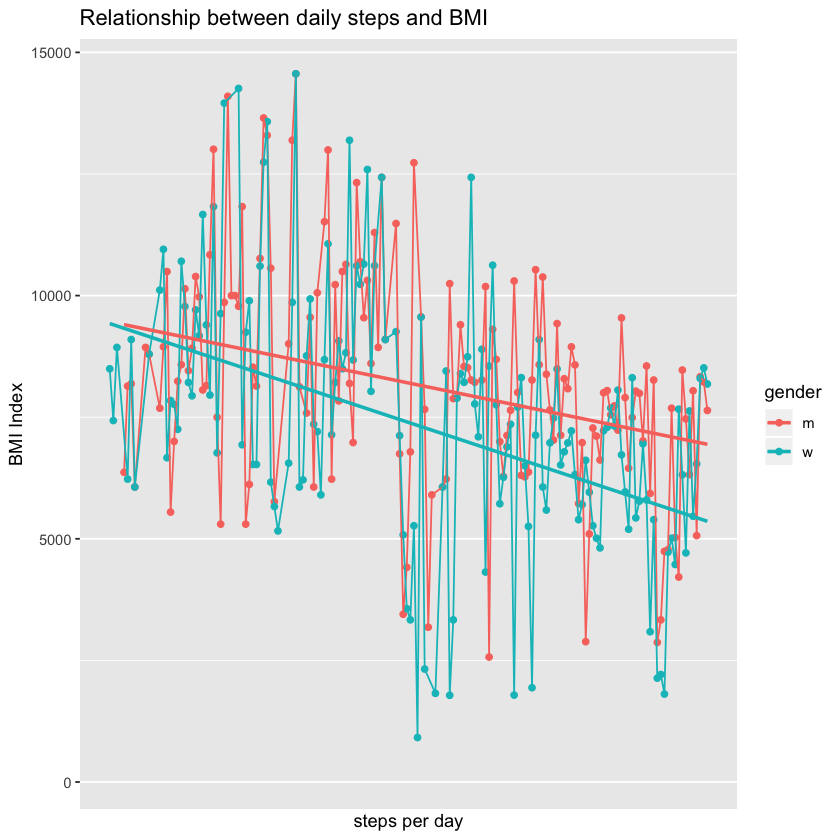

In [66]:
ggplot(health_all_filtered, aes(bmi, steps, color=gender)) +
  ggtitle("Relationship between daily steps and BMI") +
    stat_summary(geom="point") +
    stat_summary(geom="line") +
    scale_x_continuous(breaks=1:12) +
    ylab("BMI Index")+ 
xlab("steps per day")+
geom_smooth(method = "lm", se = FALSE)

- *Always visualize your data! The correlation between daily steps and BMI differ from men to women: In both cases, there's a negative correlation. But the negative correlation in women are even stronger. One can also see, that the individual data differes alot.*